In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 2 * np.pi, 100)
y = np.sin(X)
plt.plot(X, y, color = 'red', label = 'Sine')
plt.plot(X, np.cos(X), color = 'green', label = 'Consine', ls = '--')
plt.legend(bbox_to_anchor = (0,1,1,1), loc = 'lower left', mode = 'expand', borderaxespad = .3, shadow = True, fancybox = True, ncol = 2)
plt.axhspan(-.5,.5,alpha = .2, color = 'teal', zorder = 1)
plt.axvspan(3, 4, alpha = .7, color = 'gold')
plt.show()


<Figure size 640x480 with 1 Axes>

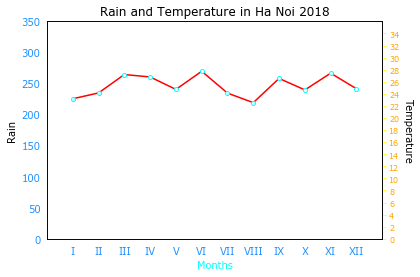

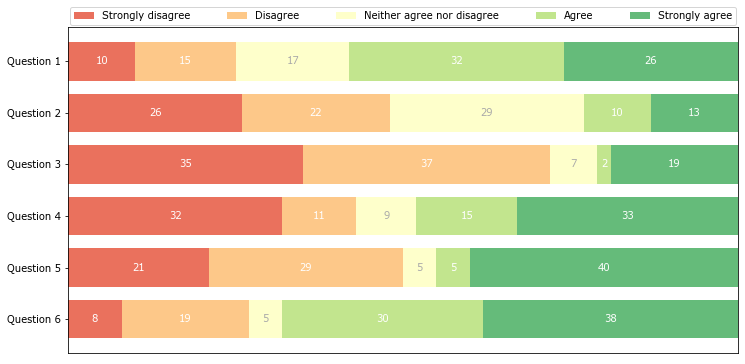

In [3]:
import numpy as np
import matplotlib.pyplot as plt;
#plt.rc('figure', autolayout = True)
fig = plt.figure(figsize = (12, 6))
category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}
groups = list(results.keys())
data = np.array(list(results.values()))

m, n = data.shape
color = plt.get_cmap('RdYlGn')(np.linspace(.15,.85,n))
cum = np.cumsum(data, axis = 1)
for i in range(n):
    left = cum[:,i-1] if i else np.zeros(m)
    rects = plt.barh(groups, data[:,i], left = left, color = color[i], alpha = .8, height = .75, label = category_names[i])
    for j ,rect in enumerate(rects):
        y, h = rect.get_y(), rect.get_height()
        #red, green, blue= color
        text_color = 'darkgray' if np.product(color[i]) > .5 else 'white'
        plt.text(left[j] + data[j,i] / 2, y + h /2, data[j,i], ha = 'center', va = 'center', color = text_color)
ax = plt.gca()
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.legend(bbox_to_anchor = (0,1,1,1), loc = 'lower left', mode = 'expand', borderaxespad = .2, ncol = n)
ax.set_xlim(0, cum[:,-1].max())
plt.show()


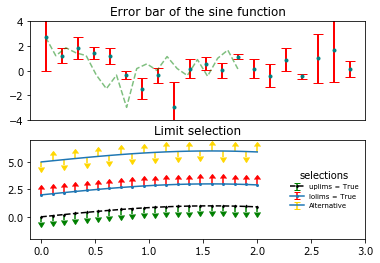

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(101)

plt.subplot(211)
N = 20
X = np.linspace(0, 12, N)
noise = np.random.normal(0, 1, N)
y = np.sin(X) + noise
err = np.random.randint(5, 10, N)
plt.errorbar(range(N), y, yerr = abs(noise), ecolor = 'red', capsize = 5, elinewidth = 2, fmt = 'o', color = 'teal', ms = 3)
plt.plot(X, y, '--g', alpha = .5)
plt.title('Error bar of the sine function')
plt.ylim(-4, 4)
plt.xticks(())


plt.subplot(212)
X = np.linspace(0, 2, N)
y = np.sin(X)
#uplims = True --> remove the upper part of every error bar
#uplims = [True, False, True, False] --> remove the upper part of errorbars at indices i : uplims[i] = True
plt.errorbar(X, y, yerr = .5, uplims = True, ecolor = 'green', fmt = '--dk', label = 'uplims = True', ms = 2)
plt.errorbar(X, y + 2, yerr = .5 , lolims = True, ecolor = 'red', fmt = '-o', label = 'lolims = True', ms = 2)
#hide uplims and lolims alternatively
up = np.arange(N) % 2 == 0
lo = np.arange(N) % 2 == 1
plt.errorbar(X, y + 5, yerr = .5, uplims = up, lolims = lo, ecolor = 'gold', capsize = 0, ms = 2, label = 'Alternative')
plt.ylim(-2, 7)
plt.xlim(-.1, 3)
plt.legend(frameon = False, loc = 5, fontsize = 7, title = 'selections')
plt.subplots_adjust(hspace = .2)
plt.title('Limit selection')
plt.show()


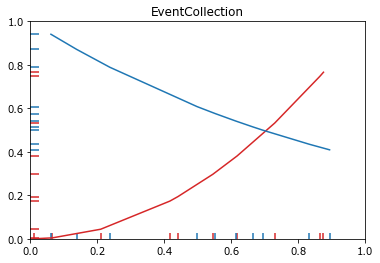

In [5]:
# A collection of discrete events.
#
# An event is a 1-dimensional value, usually the position of something along an axis,
# such as time or length. Events do not have an amplitude. They are displayed as v


import numpy as np

import matplotlib.pyplot as plt;
from matplotlib.collections import EventCollection

fig = plt.figure()
ax = fig.add_subplot(111)
X = np.random.rand(10)
X1 = np.random.rand(10)
X.sort()
X1.sort()
y = X * X
y1 = np.exp(-X1)
ax.plot(X, y, color = 'tab:red')
ax.plot(X1, y1, color = 'tab:blue')
eventX = EventCollection(X, color = 'tab:red', linelength = .05)
eventY = EventCollection(y, color = 'tab:red', linelength = .05, orientation = 'vertical')
eventX1 = EventCollection(X1, color = 'tab:blue', linelength = .05)
#orientation = 'vertical' --> the markers are on the y-axis
eventY1 = EventCollection(y1,color = 'tab:blue', linelength = .05, orientation = 'vertical')
ax.add_collection(eventX)
ax.add_collection(eventY)
ax.add_collection(eventX1)
ax.add_collection(eventY1)

ax.set(xlim = (0,1), ylim = (0,1), title = 'EventCollection')
plt.show()


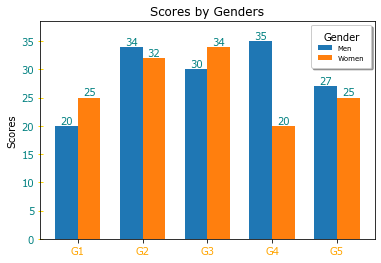

In [6]:
import numpy as np
import matplotlib.pyplot as plt;
ax = plt.axes()
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
w = .35
x = np.arange(5)
bar1 = plt.bar(x - w / 2, men_means, width =w)
bar2 = plt.bar(x + w / 2, women_means, width = w)
ax.legend((bar1, bar2), ('Men', 'Women'), fancybox = True, shadow = True, borderpad = 1, title = 'Gender', fontsize = 7)
ax.set_ylabel('Scores')
ax.set_title('Scores by Genders')
ax.set_ylim(0, 1.1 * max(men_means + women_means))
ax.tick_params(axis = 'y', labelcolor = 'teal', color = 'gold', direction = 'inout', width = 1, length = 5)
ax.tick_params(axis = 'x', labelcolor = 'orange')
def auto_label(rects):
    for r in rects:
        x, y, w = r.get_x(), r.get_height(), r.get_width()
        ax.text(x + w / 2, y, str(y), color = 'teal', ha = 'center', va = 'bottom')
auto_label(bar1)
auto_label(bar2)
ax.set_xticks(range(5))
ax.set_xticklabels(labels)

plt.show()


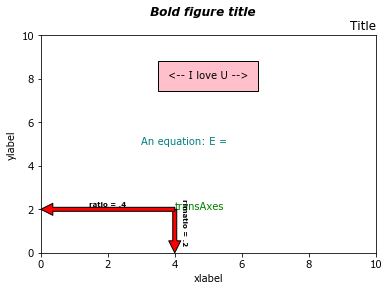

In [8]:
import numpy as np
import matplotlib.pyplot as plt;

fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle('Bold figure title', fontweight = 'bold', style = 'italic')
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')
ax.set_title('Title', loc = 'right')
ax.text(5, 8, '<-- I love U -->', bbox = {'facecolor': 'pink', 'pad': 10}, ha = 'center')
ax.text(3, 5, r'An equation: E = ', color = 'teal')
ax.text(.4, .2, 'transAxes', transform = ax.transAxes, color = 'green', fontfamily = 'Verdana')
ax.annotate(xy = (4,0), xytext = (4,2), s = '', arrowprops = {'facecolor': 'red'})
ax.annotate(xy = (0,2), xytext = (4,2), s = '', arrowprops = {'facecolor': 'red'})
ax.text(2,2.1, 'ratio = .4', ha = 'center', va = 'bottom', fontweight = 'bold', fontsize = 7)
ax.text(4.2, 0.4, 'rimatio = .2', rotation = -90, fontweight = 'bold', fontsize = 7)
ax.axis([0, 10, 0, 10])
plt.show()


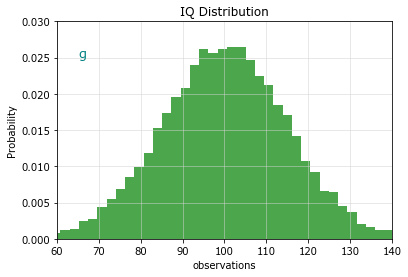

In [9]:
import matplotlib.pyplot as plt;
import numpy as np;

np.random.seed(6102001)
N = 10000
mu = 100
sigma = 15
data = mu + sigma * np.random.randn(N)
plt.hist(data, bins = 50, color = 'g', alpha = .7, density = 1)
plt.title('Normal Distribution')
plt.grid(True, linewidth = .5, color = 'lightgray')
plt.xlim(60, 140)
plt.ylim(0,.03)
plt.xlabel('observations')
plt.ylabel('Probability')
plt.title('IQ Distribution')
plt.text(65, .025, transform = plt.gca().transData, s = r'g', fontdict = {'color':'teal', 'fontsize':13})
plt.show()


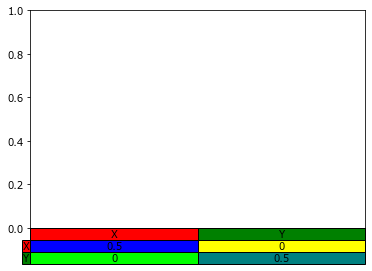

In [10]:
import numpy as np
import matplotlib.pyplot as plt;
data = [
[.5, 0],
[0, .5]
]
colors = [['blue', 'yellow'],['lime', 'teal']]
plt.table(cellText = data, rowLabels = ['X', 'Y'], colLabels = ['X', 'Y'], rowColours = ['red', 'green'], colColours = ['red', 'green'],
rowLoc = 'center', colLoc = 'center', cellLoc = 'center', cellColours = colors)
plt.xticks(())
plt.show()


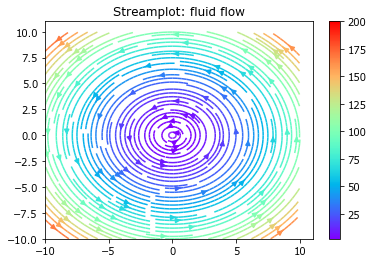

In [11]:
import numpy as np
import matplotlib.pyplot as plt;
X = np.linspace(-10, 10, 10)
Y = np.linspace(-10, 10, 10)
x, y = np.meshgrid(X, Y)
#the larger density is, the closer the fluid flow
plt.streamplot(x, y, -y, x, density = 2, cmap = 'rainbow', color = x * x + y * y)
plt.colorbar()
plt.title('Streamplot: fluid flow')
plt.show()


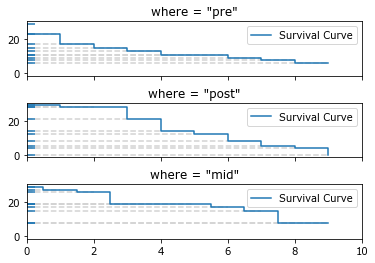

In [12]:
import numpy as np
import matplotlib.pyplot as plt;
from matplotlib.collections import EventCollection
np.random.seed(101)
fig, axes = plt.subplots(3,1,sharex = True, sharey = True, gridspec_kw = dict(hspace = .5))
where = ['pre', 'post', 'mid']
for i in range(3):
    ax = axes[i]
    N = 10
    X = np.arange(N)
    y = np.random.randint(0, 30,N)
    y.sort()
    y = y[::-1]
    #where: 'pre' --> the interval x[i] --> x[i + 1] has the value y[i]
    #       'post' --> the interval x[i] --> x[i + 1] has the value y[i]
    #       'mid': --> steps occur half-way between x positions
    ax.step(X, y,where = where[i], label = 'Survival Curve')
    ax.hlines(y = y, xmin = 0, xmax = X, ls = '--', color = 'lightgray')
    event = EventCollection(y, color = 'tab:blue', orientation = 'vertical', linelength = .5)
    ax.add_collection(event)
    ax.set_xlim(0, 10)
    ax.set_title('where = "%s"' % where[i])
    ax.legend()
plt.show()


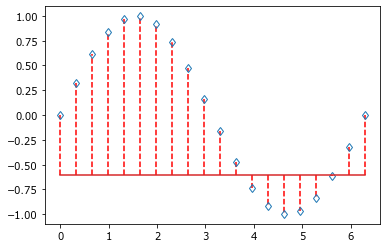

In [13]:
import numpy as np
import matplotlib.pyplot as plt;



x = np.linspace(0, 2 * np.pi, 20)
y = np.sin(x)
#bottom: the position of the baseline
marker, stem, baseline = plt.stem(x, y, linefmt = '--r', markerfmt = 'd', bottom = -.6, use_line_collection = True)
marker.set_markerfacecolor('none')
plt.show()


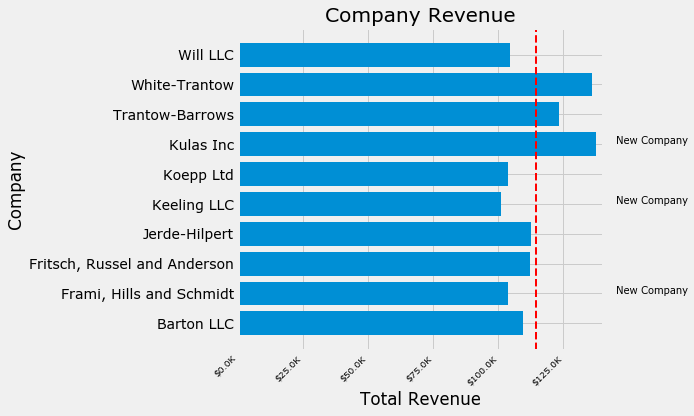

In [14]:
import matplotlib.pyplot as plt;
from matplotlib.ticker import FuncFormatter
import numpy as np
plt.style.use('fivethirtyeight')
# Controlling layout:
plt.rc('figure', autolayout = True)
fig, ax = plt.subplots(figsize = (10, 6))
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}


companies = list(data.keys())
values = list(data.values())
mean = np.mean(values)
ax.barh(companies, values)
ax.set( title = 'Company Revenue', ylabel = 'Company', xlabel = 'Total Revenue',xlim = (0, 140000))
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
labels = ax.get_xticklabels()
#rotating labels
plt.setp(labels, rotation = 45, ha = 'right', fontsize = 9)
plt.axvline(x = mean, ls = '--', c = 'red', linewidth = 2)
groups = [1, 4, 6]
for i in groups:
    ax.text(145000, i, 'New Company', fontsize = 10)

#values and positions of labels
def format(value, position):
    return '${:1}K'.format(value * 1e-3)
formatter = FuncFormatter(format)
ax.xaxis.set_major_formatter(formatter)


plt.show()


C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


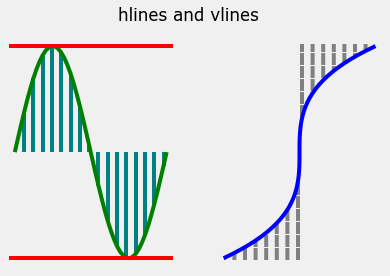

In [15]:
import numpy as np
import matplotlib.pyplot as plt;
#hlines: Plot horizontal lines at each y from xmin to xmax.
#    e.g: the i-th horizontal line has y-coordinate = y[i], starts at xmin[i] and ends at xmax[i]
#         note: if all the elements of y | xmin | xmax are the same, we can set to a scalar
#               e.g : xmax = [5,5,5] is equivalent to xmax = 5


#vlines: plot vertical lines at each x from ymin to ymax

fig, axes = plt.subplots(1,2, subplot_kw = {'xticks':[], 'yticks':[]}, gridspec_kw = {'wspace': .25})
fig.suptitle('hlines and vlines')
ax = axes[0]
X = np.linspace(0, 2 * np.pi, 50)
y = np.sin(X)
ax.plot(X, y, 'green')
ax.vlines(x = X[::3], ymin = 0, ymax = y[::3], color = 'teal')
ax.axhline(y = 1, color = 'red')
ax.axhline(y = -1, color = 'red')

ax = axes[1]
y = np.linspace(-10, 10)
X = y ** 3
plt.plot(X, y, '-b')
ax.hlines(y = y, xmin = 0, xmax = X, linestyle = ':', color = 'gray')
plt.show()


In [17]:
category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}

In [33]:
data = np.array([r for r in results.values()])
data

array([[ 10,  25,  42,  74, 100],
       [ 26,  48,  77,  87, 100],
       [ 35,  72,  79,  81, 100],
       [ 32,  43,  52,  67, 100],
       [ 21,  50,  55,  60, 100],
       [  8,  27,  32,  62, 100]], dtype=int32)

In [34]:
pos = np.c_[np.zeros(len(pos), dtype = np.int), data.cumsum(1)[:, :-1]]
pos

array([[  0,  10,  35,  77, 151],
       [  0,  26,  74, 151, 238],
       [  0,  35, 107, 186, 267],
       [  0,  32,  75, 127, 194],
       [  0,  21,  71, 126, 186],
       [  0,   8,  35,  67, 129]])

In [35]:
name = list(results.keys())
name

['Question 1',
 'Question 2',
 'Question 3',
 'Question 4',
 'Question 5',
 'Question 6']

In [46]:
color = plt.get_cmap('RdYlGn')(np.linspace(.15,.85,len(category_names)))

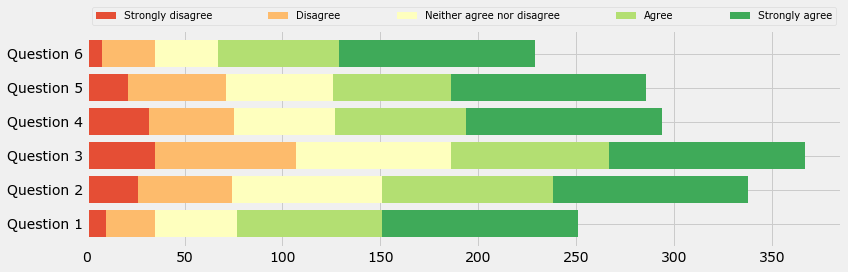

In [47]:
fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot()
for i in range(pos.shape[1]):
    ax.barh(name, data[:,i], left = pos[:,i], label = category_names[i], color = color[i])
ax.legend(bbox_to_anchor = (0, 1, 1,0), mode = 'expand', ncol = len(category_names), fancybox = True, fontsize = 10)

In [2]:
import seaborn as sns

In [5]:
sns.jointplot?